<a href="https://colab.research.google.com/github/Kiarendil/ML_FIAN2020_hometasks/blob/master/MLatFIAN2020_seminar03_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston housing dataset

Use the data and model from the seminar:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
columns = ["CRIM", "RM", "LSTAT"]

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)[columns]
X /= X.max()
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=42)

model = make_pipeline(
    PolynomialFeatures(9, include_bias=False),
    Ridge(alpha=0.1)
)

model.fit(X_train, y_train)

print('train mse = ', mean_squared_error(y_train, model.predict(X_train)))
print('test mse = ', mean_squared_error(y_test, model.predict(X_test)))

train mse =  19.312028078112938
test mse =  8.517501881762888


# Task 1

Use `sklearn.model_selection.cross_validate` to perform K-fold cross-validation of the model above. Plot histograms of train and test scores (`"neg_mean_squared_error"`) on the same plot.

Do that for 10 and 100 folds.

See the docs for more details about the function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [4]:
from sklearn.model_selection import cross_validate

In [5]:
cv_results = cross_validate(model, X_train, y_train, cv=10,
                                  scoring=('neg_mean_squared_error'), 
                                  return_train_score=True)

In [6]:
cv_results

{'fit_time': array([0.01340318, 0.00804043, 0.0080955 , 0.00734735, 0.00819278,
        0.00707316, 0.00684452, 0.00746679, 0.00729442, 0.00762892]),
 'score_time': array([0.00204325, 0.00203395, 0.00208521, 0.00191689, 0.00196624,
        0.001724  , 0.0017488 , 0.00206017, 0.00212145, 0.00213385]),
 'test_score': array([ -9.11445147, -35.42220347, -11.92802343, -33.36460671,
        -38.82506325, -14.8747401 , -17.40060746, -15.30960508,
        -10.85423431, -28.77816122]),
 'train_score': array([-20.60695375, -17.65869978, -20.15941141, -18.04916118,
        -18.10781828, -19.9956464 , -19.6681446 , -19.85160606,
        -20.34717659, -18.38845338])}

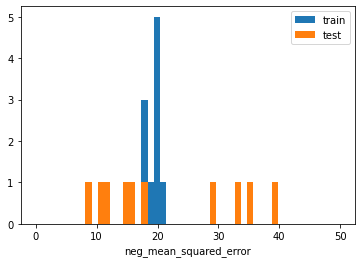

mean train =  19.283307142248308
mean test =  21.587169651926


In [18]:
bins = np.linspace(0, 50, 50)

plt.hist(-cv_results['train_score'], label='train', bins=bins)
plt.hist(-cv_results['test_score'], label='test', bins=bins)
plt.xlabel("neg_mean_squared_error")
plt.legend()
plt.show()

print('mean train = ', -cv_results['train_score'].mean())
print('mean test = ', -cv_results['test_score'].mean())

In [9]:
cv_results100 = cross_validate(model, X_train, y_train, cv=100,
                                  scoring=('neg_mean_squared_error'), 
                                  return_train_score=True)
cv_results100

{'fit_time': array([0.01748991, 0.01097798, 0.00893903, 0.01071906, 0.00756097,
        0.00726342, 0.00927997, 0.00828719, 0.00787497, 0.00782657,
        0.00782442, 0.00823402, 0.00760078, 0.00752854, 0.0073235 ,
        0.00763702, 0.00767851, 0.00780654, 0.00742602, 0.00756145,
        0.00752091, 0.00764751, 0.00777435, 0.00737619, 0.00757265,
        0.00855589, 0.00771236, 0.00730896, 0.00738096, 0.0073545 ,
        0.00740552, 0.00724888, 0.00768065, 0.00944424, 0.00738788,
        0.007617  , 0.00740695, 0.00711656, 0.00703335, 0.00711513,
        0.00691938, 0.00722218, 0.00774002, 0.00731945, 0.0071764 ,
        0.00743771, 0.00743556, 0.00773525, 0.0076499 , 0.00708246,
        0.00698757, 0.00697351, 0.00693274, 0.0070312 , 0.00700784,
        0.00709009, 0.00714612, 0.00738215, 0.00713778, 0.00693727,
        0.00734329, 0.00767255, 0.00780463, 0.00744152, 0.00727606,
        0.00762057, 0.00869322, 0.01913047, 0.00803971, 0.00843716,
        0.00814009, 0.00801468, 0.00

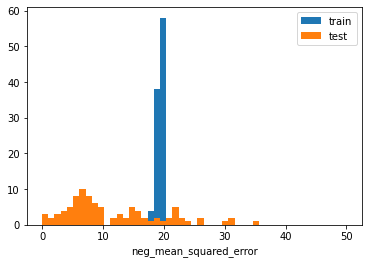

mean train =  19.309424266841145
mean test =  21.2369598262141


In [17]:
bins100 = np.linspace(0, 50, 50)

plt.hist(-cv_results100['train_score'], label='train', bins = bins100)
plt.hist(-cv_results100['test_score'], label='test', bins = bins100)
plt.xlabel("neg_mean_squared_error")
plt.legend()
plt.show()

print('mean train = ', -cv_results100['train_score'].mean())
print('mean test = ', -cv_results100['test_score'].mean())